# GRAPHS
This notebook reads jobs_info.csv and provides some visual information about the distribution of the jobs.

In [19]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.options.display.float_format = None
from scipy import stats
from numpy import inf

sns.set_context("notebook", font_scale=1.25)


def logx_kde(x, y, xmin, xmax, ymin, ymax):
    x[x==0]=0.1
    x = np.log10(x)
    # Peform the kernel density estimate
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    values[values == -inf] = 0.1
    values[values == 0] = 0.1
    print('values=',values)
    kernel = stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    return np.power(10, xx), yy, f
    
def plot_log_pdf(sample,ax):
    x0, x1 = ax.get_xlim()
    x_pdf = np.exp(np.linspace(np.log(x0),np.log(x1),5000))
    fitted_params = stats.invgauss.fit(sample)
    y_pdf = stats.invgauss.pdf(x_pdf, *fitted_params)
    # rescaled pdf:
    y_pdf_rescaled = y_pdf * x_pdf * np.log(10)
    #ax.plot(x_pdf, y_pdf_rescaled, 'b', lw=1)
    ax.plot(x_pdf, y_pdf_rescaled, sns.color_palette()[0][0], lw=1.5)



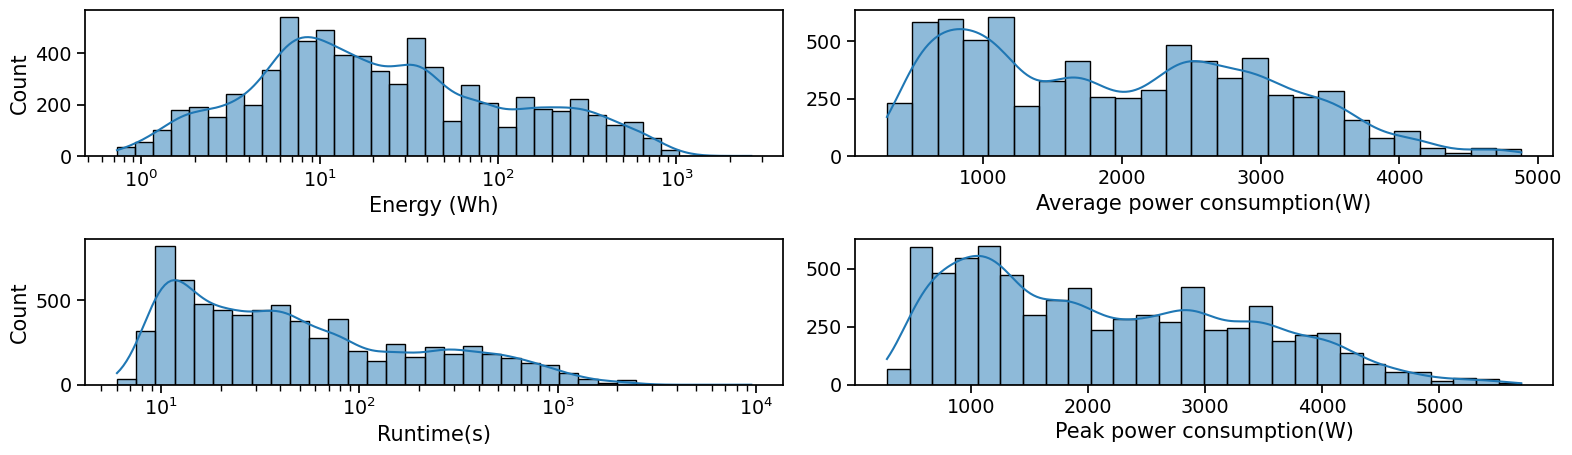

In [20]:
df= pd.read_csv('jobs_info.csv', index_col="jobid")
df.energy_from_delta_e *=1000

df1= df.loc[df['error_code'] != 1]
print('ENERGY:',df1['energy_from_delta_e'].describe())
print('RUNTIME:',df1['runtime'].describe())
print('MEAN POWER:',df1['mean_sys_power_from_delta_e'].describe())
print('PEAK POWER:',df1['max_sys_power'].describe())
df=df1


fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
ax1=sns.histplot(data=df, x="energy_from_delta_e",log_scale=True,ax=axs[0, 0],kde=True)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax2=sns.histplot(data=df, x="runtime",log_scale=True,ax=axs[1, 0],kde=True)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax3=sns.histplot(data=df, x="mean_sys_power_from_delta_e",ax=axs[0, 1],kde=True)
ax3.set(xlabel='Average power consumption(W)', ylabel='')
ax4=sns.histplot(data=df, x="max_sys_power",ax=axs[1, 1],kde=True)
ax4.set(xlabel='Peak power consumption(W)', ylabel='')
plt.tight_layout()



In [10]:
df = df.drop(df[df['number_of_nodes'].isna()].index)
print(df['number_of_nodes'].unique())


[ 3.  4.  5.  6.  7.  8.  9. 10. 12. 11. 14. 13. 16.  2.]


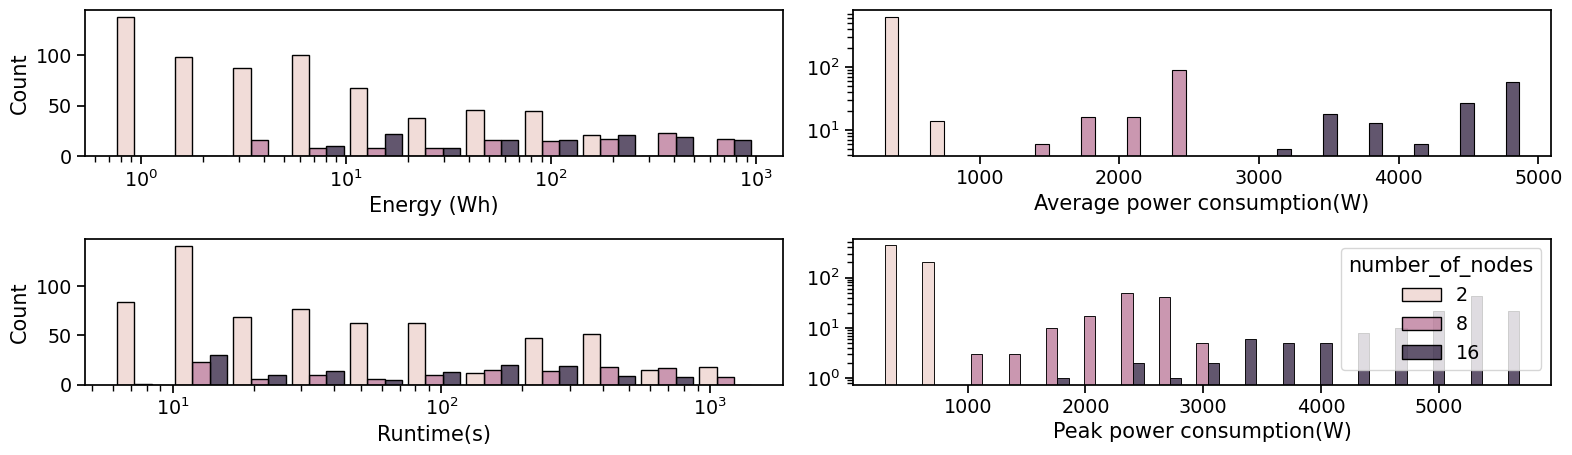

In [10]:
# 'Distribution when different number of nodes are employed'
df['number_of_nodes']= df['number_of_nodes'].astype(int)
df_by_nodes = df.loc[ df['number_of_nodes'].isin([2,8,16]) ]
#df_by_nodes = df_by_nodes.loc[ df_by_nodes['error_code'] == 0 ]

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
ax1=sns.histplot(data=df_by_nodes, x="energy_from_delta_e",hue = "number_of_nodes",log_scale=True,multiple="dodge", ax=axs[0, 0],shrink=.9)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax1.get_legend().set_visible(False)
ax2=sns.histplot(data=df_by_nodes, x="runtime",hue = "number_of_nodes",log_scale=True,multiple="dodge", ax=axs[1, 0],shrink=.9)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax2.get_legend().set_visible(False)
ax3=sns.histplot(data=df_by_nodes, x="mean_sys_power_from_delta_e",hue = "number_of_nodes",multiple="dodge", ax=axs[0,1],shrink=.9)
ax3.set(xlabel='Average power consumption(W)', ylabel='', yscale="log")
ax3.get_legend().set_visible(False)
ax4=sns.histplot(data=df_by_nodes, x="max_sys_power",hue = "number_of_nodes",multiple="dodge", ax=axs[1,1],shrink=.9)
ax4.set(xlabel='Peak power consumption(W)', ylabel='', yscale="log")
sns.move_legend(ax4, "upper right")

plt.tight_layout()

[21120. 26400.  5280. 10560. 15840. 31680. 36960. 42240.]


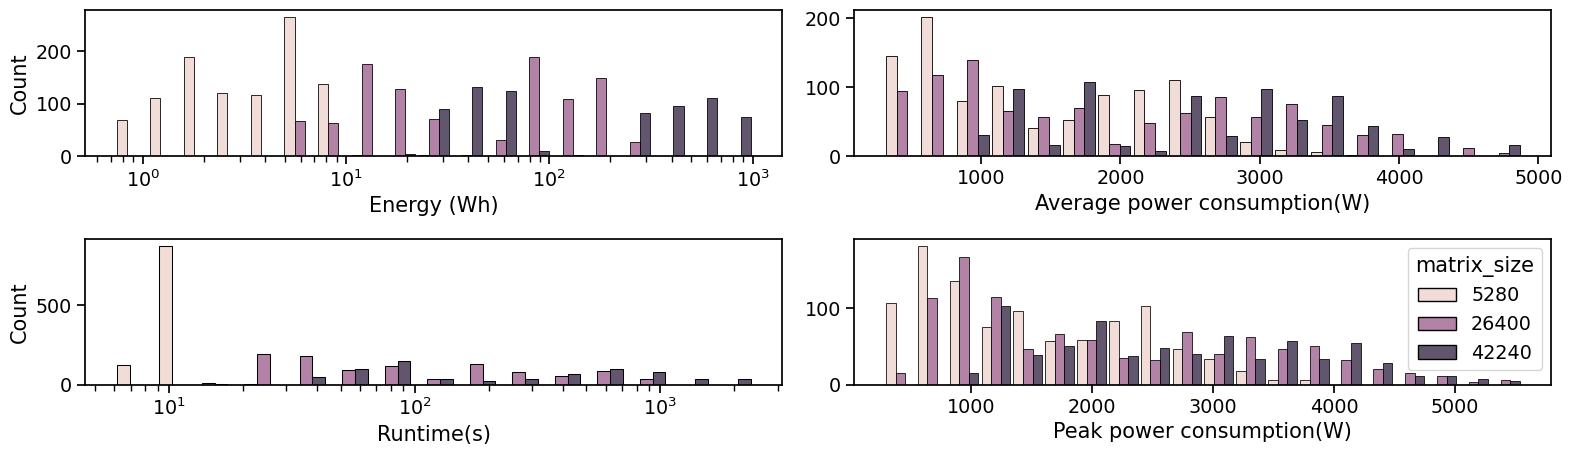

In [5]:
# 'Distributions when computing matrices of different sizes'

print(df['matrix_size'].unique())
df['matrix_size']= df['matrix_size'].astype(int)

df_by_nodes = df.loc[df['matrix_size'].isin([5280,26400,42240])]

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
ax1=sns.histplot(data=df_by_nodes, x="energy_from_delta_e",hue = "matrix_size",log_scale=True,multiple="dodge", ax=axs[0, 0],shrink=.9)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax1.get_legend().set_visible(False)
ax2=sns.histplot(data=df_by_nodes, x="runtime",hue = "matrix_size",log_scale=True,multiple="dodge", ax=axs[1, 0],shrink=.9)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax2.get_legend().set_visible(False)
ax3=sns.histplot(data=df_by_nodes, x="mean_sys_power_from_delta_e",hue = "matrix_size",multiple="dodge", ax=axs[0,1],shrink=.9)
ax3.set(xlabel='Average power consumption(W)', ylabel='')
ax3.get_legend().set_visible(False)
ax4=sns.histplot(data=df_by_nodes, x="max_sys_power",hue = "matrix_size",multiple="dodge", ax=axs[1,1],shrink=.9)
ax4.set(xlabel='Peak power consumption(W)', ylabel='')
#ax4.get_legend().set_visible(False)

plt.tight_layout()

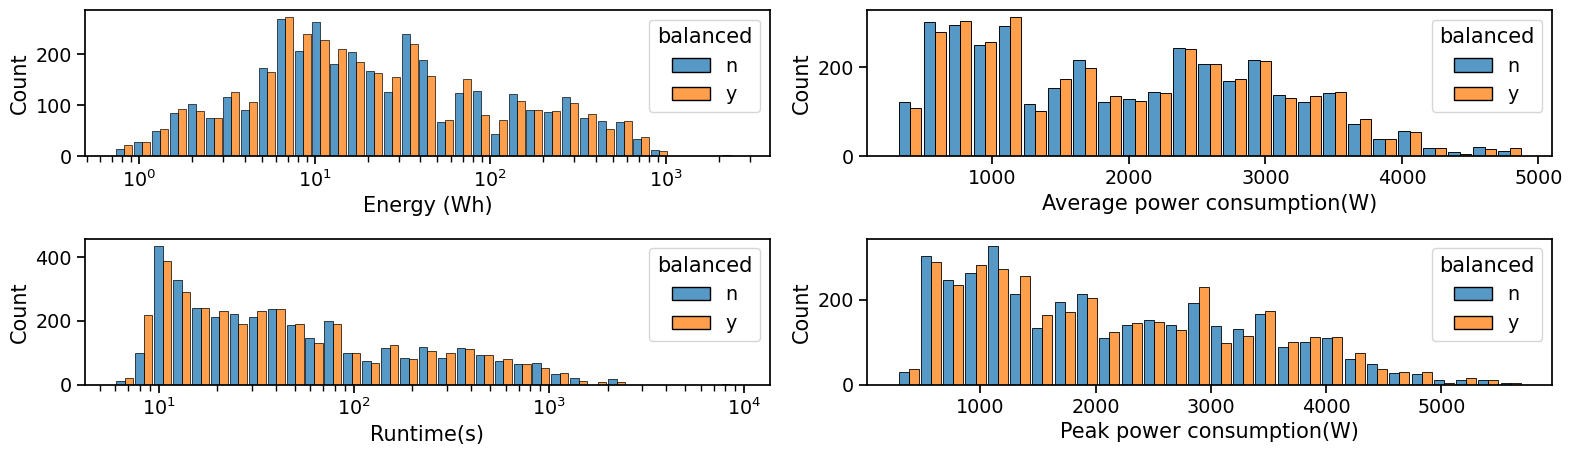

In [6]:
# 'Distributions when balanced/unbalanced'
df_by_nodes = df

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
ax1=sns.histplot(data=df_by_nodes, x="energy_from_delta_e",hue = "balanced",log_scale=True,multiple="dodge", ax=axs[0, 0],shrink=.9)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax2=sns.histplot(data=df_by_nodes, x="runtime",hue = "balanced",log_scale=True,multiple="dodge", ax=axs[1, 0],shrink=.9)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax3=sns.histplot(data=df_by_nodes, x="mean_sys_power_from_delta_e",hue = "balanced",multiple="dodge", ax=axs[0,1],shrink=.9)
ax3.set(xlabel='Average power consumption(W)', ylabel='Count')
ax4=sns.histplot(data=df_by_nodes, x="max_sys_power",hue = "balanced",multiple="dodge", ax=axs[1,1],shrink=.9)
ax4.set(xlabel='Peak power consumption(W)', ylabel='Count')
plt.tight_layout()

[0 1 2 4 8]


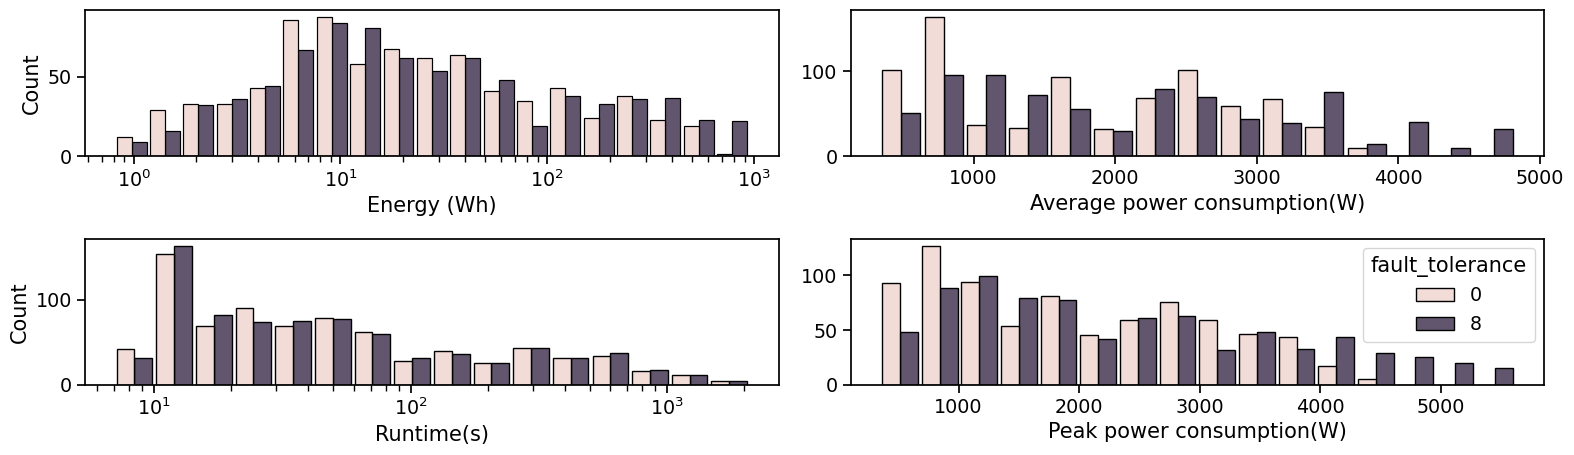

In [7]:
jdf = pd.read_csv('jobs_data.csv', index_col=None,header=0)
filtered_jdf_df = jdf.filter(['jobid','fault_tolerance','fault_happened'], axis=1)
filtered_jdf_df.head()
info_df=df.join(filtered_jdf_df.set_index('jobid'), on='jobid')
print(info_df['fault_tolerance'].unique())
info_df_t = info_df.loc[info_df['fault_tolerance'].isin([0,8]) & info_df['fault_happened'].isin([0])]

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
ax1=sns.histplot(data=info_df_t, x="energy_from_delta_e",hue = "fault_tolerance",log_scale=True,multiple="dodge", ax=axs[0, 0],shrink=.9)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax1.get_legend().set_visible(False)
ax2=sns.histplot(data=info_df_t, x="runtime",hue = "fault_tolerance",log_scale=True,multiple="dodge", ax=axs[1, 0],shrink=.9)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax2.get_legend().set_visible(False)
ax3=sns.histplot(data=info_df_t, x="mean_sys_power_from_delta_e",hue = "fault_tolerance",multiple="dodge", ax=axs[0,1],shrink=.9)
ax3.set(xlabel='Average power consumption(W)', ylabel='')
ax3.get_legend().set_visible(False)
ax4=sns.histplot(data=info_df_t, x="max_sys_power",hue = "fault_tolerance",multiple="dodge", ax=axs[1,1],shrink=.9)
ax4.set(xlabel='Peak power consumption(W)', ylabel='')
plt.tight_layout()



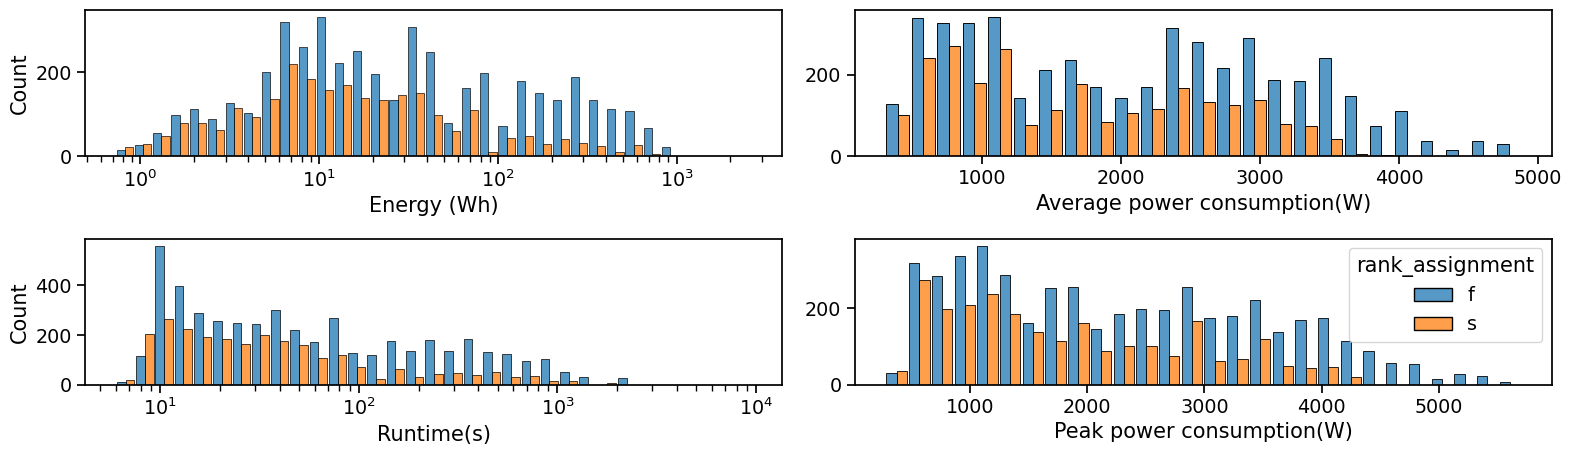

In [13]:
#print(df['total_proc'].unique())

# 'Distributions when nodes are full or not'

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
ax1=sns.histplot(data=df_by_nodes, x="energy_from_delta_e",hue = "rank_assignment",log_scale=True,multiple="dodge", ax=axs[0, 0],shrink=.9)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax1.get_legend().set_visible(False)
ax2=sns.histplot(data=df_by_nodes, x="runtime",hue = "rank_assignment",log_scale=True,multiple="dodge", ax=axs[1, 0],shrink=.9)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax2.get_legend().set_visible(False)
ax3=sns.histplot(data=df_by_nodes, x="mean_sys_power_from_delta_e",hue = "rank_assignment",multiple="dodge", ax=axs[0,1],shrink=.9)
ax3.set(xlabel='Average power consumption(W)', ylabel='')
ax3.get_legend().set_visible(False)
ax4=sns.histplot(data=df_by_nodes, x="max_sys_power",hue = "rank_assignment",multiple="dodge", ax=axs[1,1],shrink=.9)
ax4.set(xlabel='Peak power consumption(W)', ylabel='')
plt.tight_layout()

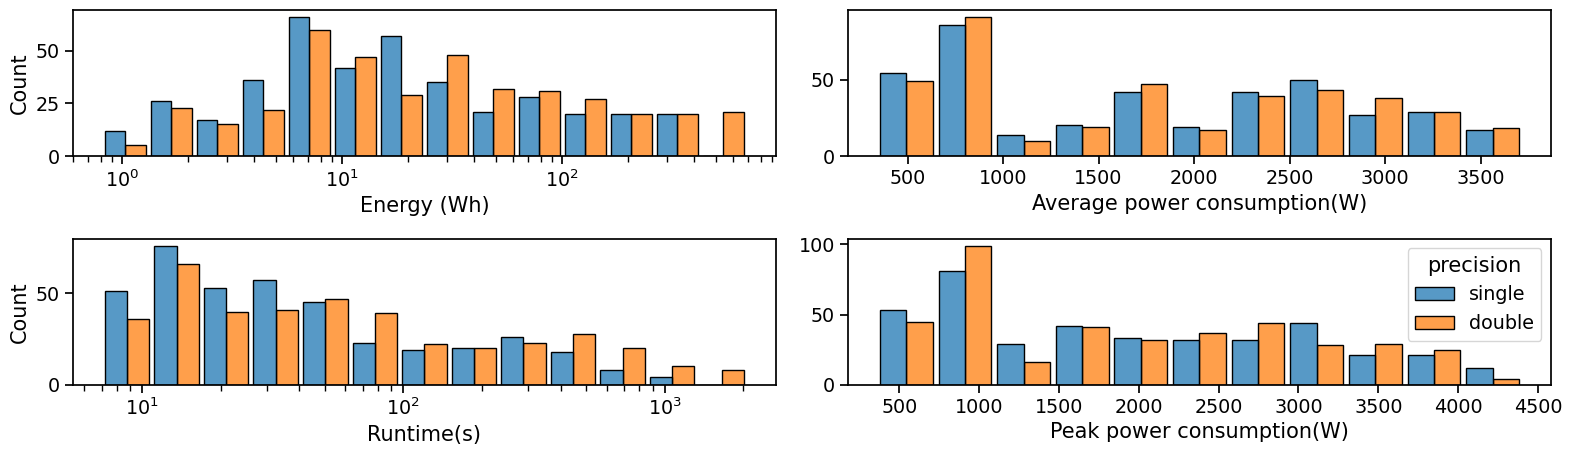

In [15]:
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
ax1=sns.histplot(data=df, x="energy_from_delta_e",hue = "precision",log_scale=True,multiple="dodge", ax=axs[0, 0],shrink=.9)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax1.get_legend().set_visible(False)
ax2=sns.histplot(data=df, x="runtime",hue = "precision",log_scale=True,multiple="dodge", ax=axs[1, 0],shrink=.9)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax2.get_legend().set_visible(False)
ax3=sns.histplot(data=df, x="mean_sys_power_from_delta_e",hue = "precision",multiple="dodge", ax=axs[0,1],shrink=.9)
ax3.set(xlabel='Average power consumption(W)', ylabel='')
ax3.get_legend().set_visible(False)
ax4=sns.histplot(data=df, x="max_sys_power",hue = "precision",multiple="dodge", ax=axs[1,1],shrink=.9)
ax4.set(xlabel='Peak power consumption(W)', ylabel='')
plt.tight_layout()

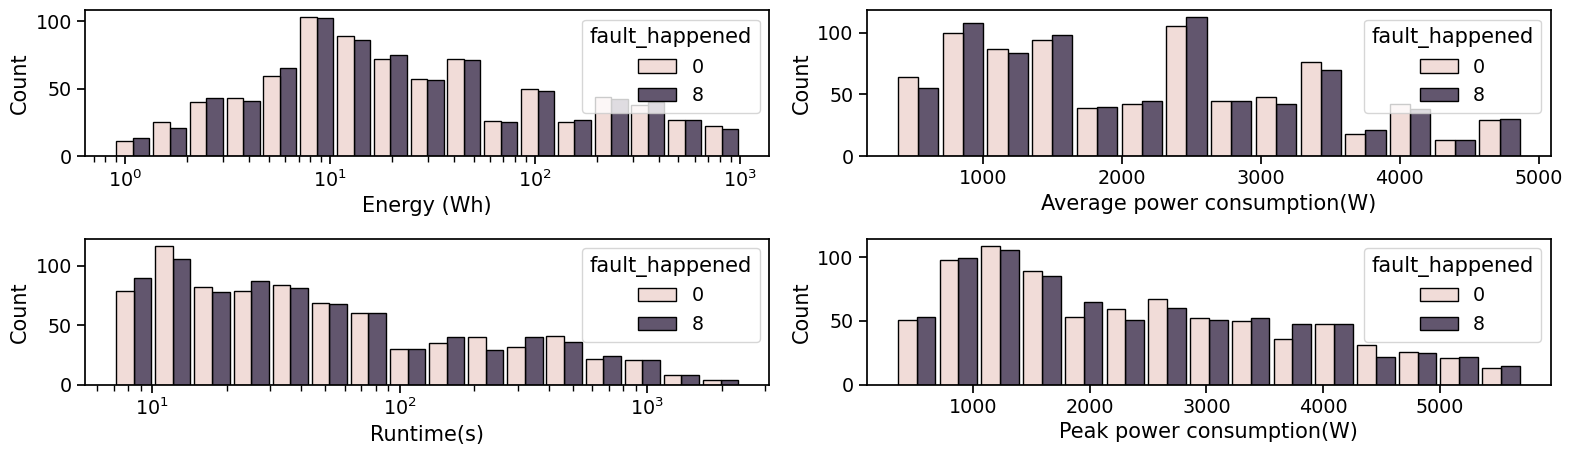

In [10]:
#print(info_df['fault_happened'].unique())
info_df_h = info_df.loc[info_df['fault_happened'].isin([0,8]) & info_df['fault_tolerance'].isin([8]) ]

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
ax1=sns.histplot(data=info_df_h, x="energy_from_delta_e",hue = "fault_happened",log_scale=True,multiple="dodge", ax=axs[0, 0],shrink=.9)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax2=sns.histplot(data=info_df_h, x="runtime",hue = "fault_happened",log_scale=True,multiple="dodge", ax=axs[1, 0],shrink=.9)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax3=sns.histplot(data=info_df_h, x="mean_sys_power_from_delta_e",hue = "fault_happened",multiple="dodge", ax=axs[0,1],shrink=.9)
ax3.set(xlabel='Average power consumption(W)', ylabel='Count')
ax4=sns.histplot(data=info_df_h, x="max_sys_power",hue = "fault_happened",multiple="dodge", ax=axs[1,1],shrink=.9)
ax4.set(xlabel='Peak power consumption(W)', ylabel='Count')
plt.tight_layout()

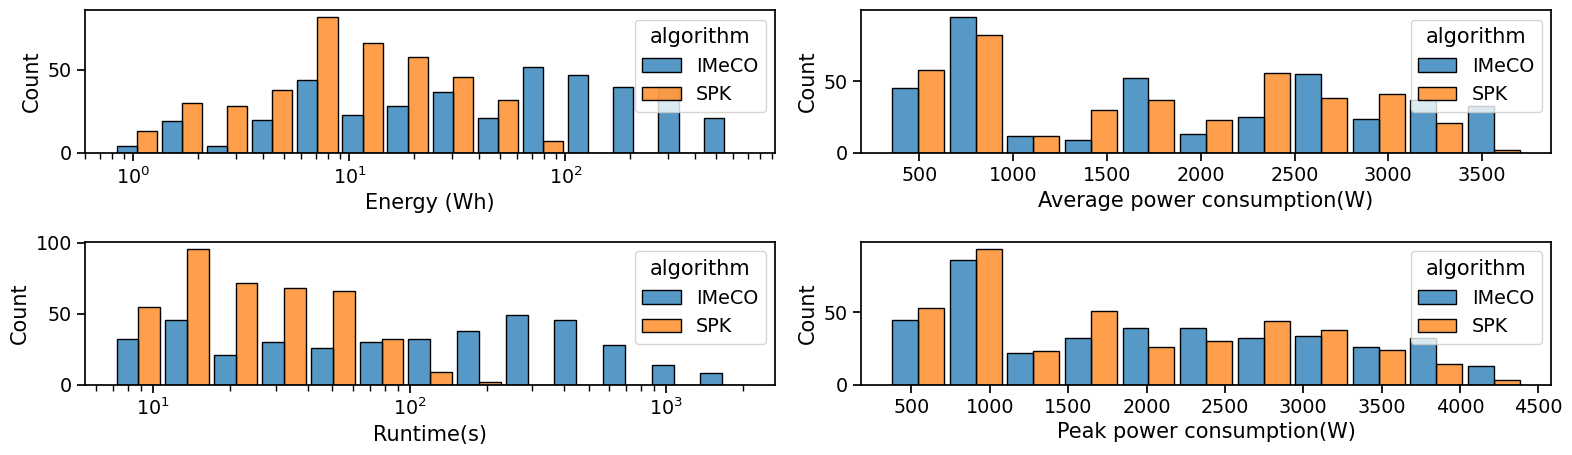

In [11]:
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(16)
df = info_df.loc[info_df['fault_tolerance'].isin([0])]

ax1=sns.histplot(data=df, x="energy_from_delta_e",hue = "algorithm",log_scale=True,multiple="dodge", ax=axs[0, 0],shrink=.9)
ax1.set(xlabel='Energy (Wh)', ylabel='Count')
ax2=sns.histplot(data=df, x="runtime",hue = "algorithm",log_scale=True,multiple="dodge", ax=axs[1, 0],shrink=.9)
ax2.set(xlabel='Runtime(s)', ylabel='Count')
ax3=sns.histplot(data=df, x="mean_sys_power_from_delta_e",hue = "algorithm",multiple="dodge", ax=axs[0,1],shrink=.9)
ax3.set(xlabel='Average power consumption(W)', ylabel='Count')
ax4=sns.histplot(data=df, x="max_sys_power",hue = "algorithm",multiple="dodge", ax=axs[1,1],shrink=.9)
ax4.set(xlabel='Peak power consumption(W)', ylabel='Count')
plt.tight_layout()